In [91]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit import BasicAer
from qiskit.visualization import plot_histogram

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

### QRAM implementation in qiskit

In [103]:
def QRAM(no_of_address_qubits):
    a = no_of_address_qubits
    r = 2**a # no.of routing qubits
    m = 2**a # no. of memory qubits
    bus = 1
    
    qr_a = QuantumRegister(a, "a")
    qr_r = QuantumRegister(r, "r")
    qr_m  = QuantumRegister(m,  "m")
    qr_bus = QuantumRegister(bus, "bus")
    cr_bus = ClassicalRegister(bus, "readout")
    
    qc = QuantumCircuit(qr_a,qr_r,qr_m,qr_bus, cr_bus)
    
    ## adjust the address here
    
    qc.x(qr_a[1])
    ## play with the memory element here if you want
    qc.x(qr_m[1])
    ##
    qc.barrier()
    
### here we will start with the branching
    # there is X gate at the second qubit first
    
    qc.x(qr_r[1])
    # the first branching 
    qc.cx(qr_a[0],qr_r[0])
    qc.cx(qr_r[0],qr_r[1])
    qc.barrier()
    
    # further branchings 
    if a==1:
        return qc
    else:
        # no. of address bits = no. of rouitng iterations
        for i in range(2,a+1):
            for j in range(0,2**(i - 1)):
                qc.ccx(qr_a[i-1], qr_r[j], qr_r[j + 2**(i-1)])
                qc.cx(  qr_r[j + 2**(i-1)], qr_r[j])
            qc.barrier()

### measuring using measure one
    qc = qc + meas_QRAM(a)

## finally measuring the bus
    qc.measure(qr_bus, cr_bus)
    
    return qc

In [75]:
def meas_QRAM(no_of_address_qubits):
    a = no_of_address_qubits
    r = 2**a # no.of routing qubits
    m = 2**a # no. of memory qubits
    bus = 1
    
    qr_a = QuantumRegister(a, "a")
    qr_r = QuantumRegister(r, "r")
    qr_m  = QuantumRegister(m,  "m")
    qr_bus = QuantumRegister(bus, "bus")
    cr_bus = ClassicalRegister(bus, "readout")
    
    qc = QuantumCircuit(qr_a,qr_r,qr_m,qr_bus, cr_bus)
    
### measruing the correct qubit is the main things
    ## here we will make the array which has the ability to couple to the correct qubit it goes like 
    ##  1          10         100
    ##  0          00         000
    ##             11         110
    ##             01         010
    ##                        101 .... so on basically half the qubits gets concatinated with 0 and other half with 1

    div = np.array([1,0])
    new_div = np.zeros(2**(a))
    
    for i in range(0,a-1): # here i controls the number of times this loop runs, each time we move one level ahead
        div = np.append(div,div)
        dim = len(div)
        for j in range(0,int(dim/2)):
            new_div[j] = numConcat(div[j],0)
        for j in range(int(dim/2),int(dim)):
            new_div[j] = numConcat(div[j],1)
        div = new_div[0:dim]
        
    # cnverting the array to decimal
    div_decimal = np.zeros(len(div))
    for i in range(0, len(div)):
        div_decimal[i]  = int(binaryToDecimal(div[i])) 
## here is the quantum circuit part of things which do the job

    for i in range(0, 2**a  ):
        qc.ccx(qr_r[i], qr_m[int(div_decimal[i])], qr_bus)
        
        
### you can adjust th

    
    return qc

In [66]:
## to functions that we will be using for concatination of "0" and "1" in front the numbers and the other one for addition for the conversion of the binary to decimal 
def binaryToDecimal(binary):
     
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal 
    
def numConcat(num1, num2):
  
     # find number of digits in num2
     digits = len(str(num2))
  
     # add zeroes to the end of num1
     num1 = num1 * (10**digits)
  
     # add num2 to num1
     num1 += num2
  
     return num1

### Verification of working to see whether our code works or not

In [105]:
qc = QRAM(2)

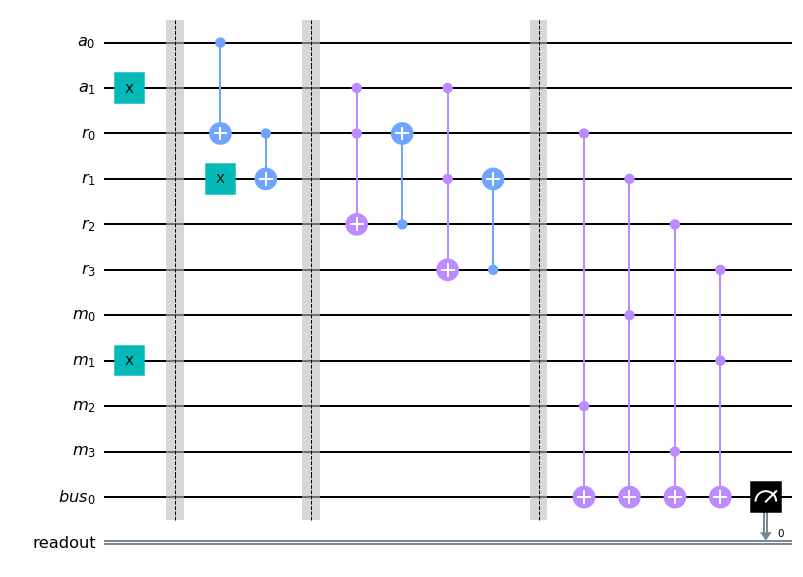

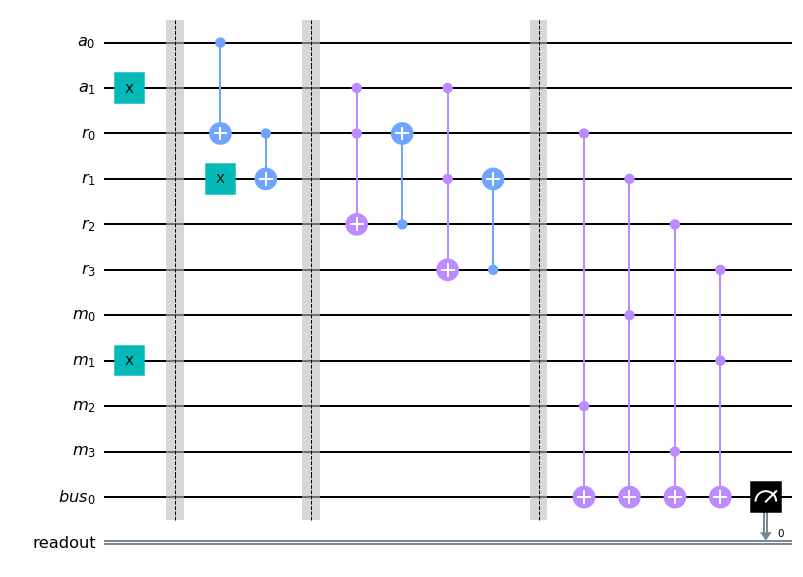

In [106]:
qc.draw('mpl')

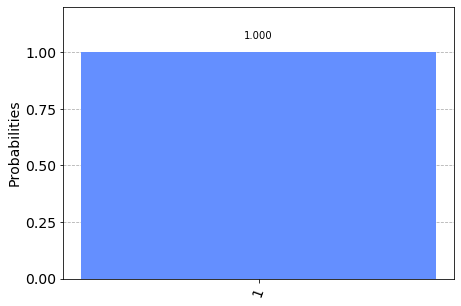

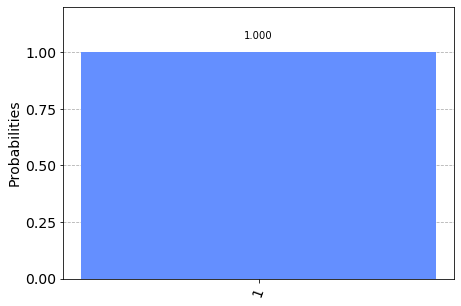

In [102]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc,backend)
counts = job.result().get_counts()
plot_histogram(counts)

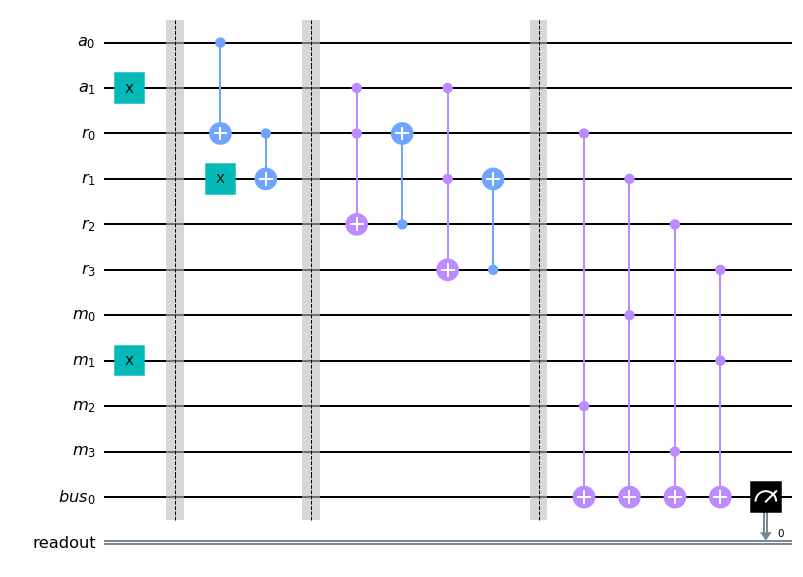

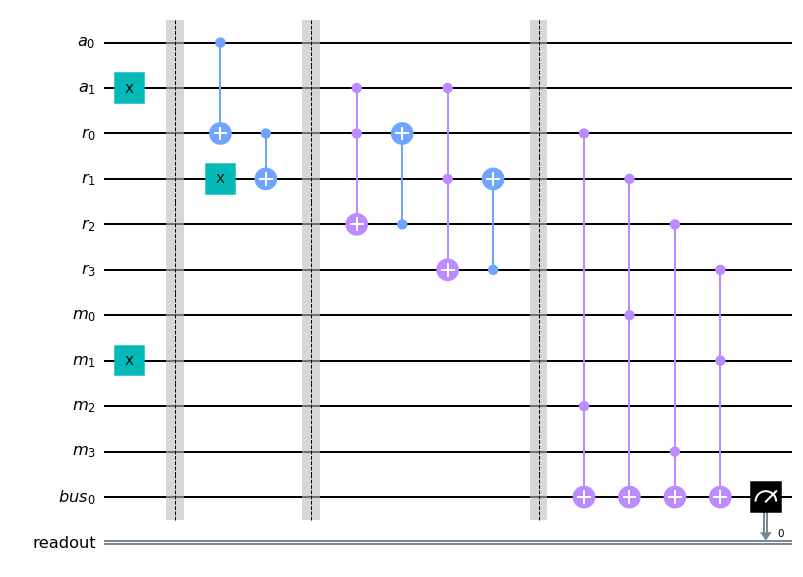

In [107]:
QRAM(2).draw('mpl')

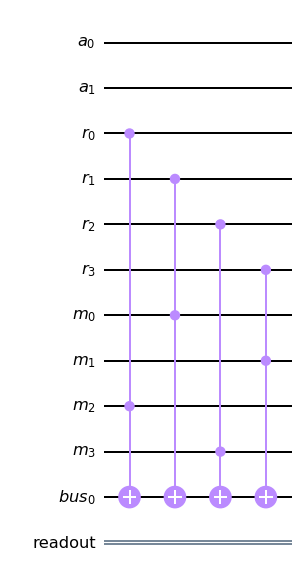

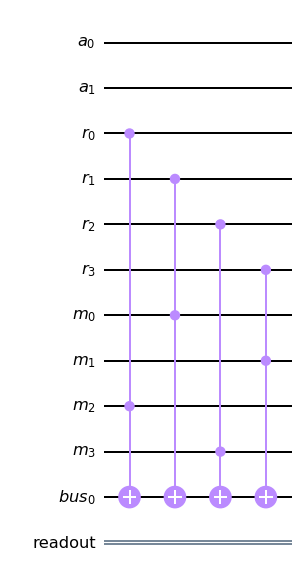

In [76]:
meas_QRAM(2).draw('mpl')

In [1]:
for i in range(2,4):
    print(i)

2
3
